# <span style="color:blue"> <center> **Proyecto 1:** 
## <center> <span style="color:blue"> Predicción de Gastos Médicos Mediante Modelos de Regresión.

### <center><span style="color:blue"> Eduardo Alberto Domínguez Fontes

### Objetivo general: Hacer una comparación de los diferentes modelos de machine learning para resolver un problema de regresión desde el enfoque de aprendizaje supervisado.

### Objetivos específicos: 
- Seleccionar el mejor modelo de machine learning para elaborar predicciones de los gastos médicos anuales en los clientes de la aseguradora.
- Aplicar diferentes métricas de desempeño para hacer la comparación.
- Implementar las técnicas de calibración de hiperparámetros y de validación cruzada.


In [131]:
# Importamos las librerías que vamos a utilizar
import pandas as pd     # Lectura y manipulación de DataFrames
import numpy as np      # Operaciones matemáticas 

# Librerías de SciKit Learn
from sklearn.linear_model import LinearRegression, Ridge, Lasso     # Modelos de regresión 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, RepeatedKFold, train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler      # Para el reescalamiento de los datos

# Librerías para gráficas
import matplotlib.pyplot as plt
import seaborn as sns


Partimos de la base de datos gastos_medicos.csv que contiene la siguiente información:

a ) edad: edad del asegurado.

b ) sexo: género del asegurado.

c) imc: índice de masa corporal.

d ) fumador: Si el asegurado fuma.

e ) region: región de residencia del asegurado.

f ) hijos: Número de hijos del asegurado/Dependientes económicos.

g ) gastos: Costo anual total en servicios médicos.

In [3]:
# Leemos los datos
data=pd.read_csv("gastos_medicos.csv")
data

,edad,sexo,imc,hijos,fumador,region,gastos
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


Podemos ver que la base de datos se compone de 7 columnas o atributos (una de ellas es la variable de respuesta o target y las demás son atributos) y 1338 registros.

<hr style="color:blue">

# <center> <span style="color:blue"> Análisis Exploratorio y Descriptivo de los Datos
<hr style="color:blue">

Se realiza una descripción del tipo de dato de los atributos y verificamos si hay datos faltantes.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   edad     1338 non-null   int64  
 1   sexo     1338 non-null   object 
 2   imc      1338 non-null   float64
 3   hijos    1338 non-null   int64  
 4   fumador  1338 non-null   object 
 5   region   1338 non-null   object 
 6   gastos   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.isna().sum()

edad       0
sexo       0
imc        0
hijos      0
fumador    0
region     0
gastos     0
dtype: int64

Notamos que los atributos "sexo, fumador y region" son de tipo categóricos y "edad, imc, hijos y gastos" son de tipo numérico.

No hay datos faltantes en la base de datos, pero eso no significa que esta completa la base de datos, pueden haber datos codificados los cuales podemos identificar al realizar un análisis descriptivo más profundo de las variables numéricas. Además, debido a que la variable de respuesta (target) es de tipo numérica, en este caso es la columna de "gastos", se tiene un problema de regresión.

NOTA: El target no tiene datos faltantes, esto es importante, ya que de tener datos faltantes, los registros asociados a estos deben ser eliminados completamente, ya que no podemos trabajar esos datos faltantes en la variable de respuesta, con los demás atributos no hay problema, se pueden aplicar técnicas de preprocesamiento para completarlos.

In [6]:
# Realizamos una descripción estadística de los atributos numéricos.
data.describe()     # Solo hace una descripción estadística de las variables continuas, ya que de las discretas no tendría sentido.

,edad,imc,hijos,gastos
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


A partir de la descripción estadística de los atributos numéricos podemos analizar de una mejor manera la distribución que presentan estos datos, e incluso saber si hay valores codificados.

Podemos ver la media de cada atributo, desviación estándar, los cuartiles que dividen en porcentajes a los datos, la media y valores mínimos y máximos de los atributos numéricos. Por lo tanto a partir de esto podemos comenzar a hacer inferencias de cuál de los atributos puede tener mas valores Outlayers a partir del rango intercuartílico (IQR), sin embargo, para analizar esto de mejor manera podemos crear gráficas de caja (o de bigote), en las cuales se muestra de manera mas simple la distribución de los datos:

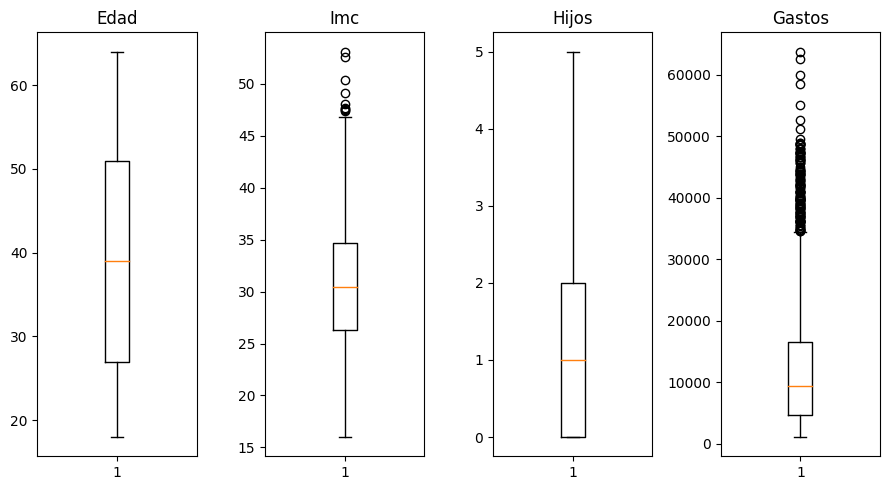

In [7]:
# Representación gráfica de los atributos numéricos para sus cuartiles, esto es, para visualizar la distribución de los datos.
plt.figure(figsize=(9,5))

plt.subplot(1,4,1)
plt.boxplot(data.edad)
plt.title("Edad")

plt.subplot(1,4,2)
plt.boxplot(data.imc)
plt.title("Imc")

plt.subplot(1,4,3)
plt.boxplot(data.hijos)
plt.title("Hijos")

plt.subplot(1,4,4)
plt.boxplot(data.gastos)
plt.title("Gastos")

plt.tight_layout()
plt.show()

De manera gráfica: Dentro de las cajas se encuentra el 50% de todos los datos, entonces podemos ver entre que rango se encuentran, y de esta manera saber directamente si la distribución presenta un sesgo y hacia que lado, además, también podemos ver los valores Outlayers, siendo la variable de respuesta gastos la que mas de estos valores presenta. Las lineas que salen a las cajas se generan a partir del rango intercuartílico (la diferencia entre el tercer cuartil y el primer cuartil), representan el rango en el que los valores no se consideran atípicos (Outlayers) y podemos calcularlas como 1.5(IQR)


Del target, podemos observar rápidamente que la mediana se encuentra por debajo de la media, esto quiere decir que la distribución de los datos es asimétrica sesgada hacia la izquierda.

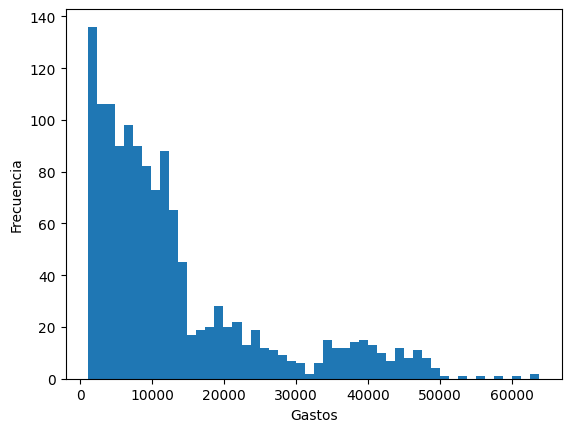

In [8]:
# Distribución de los gastos médicos (valores originales)    
plt.hist(data.gastos,bins=50)   # bins es el número de barras que aparecen
plt.xlabel("Gastos")
plt.ylabel("Frecuencia")
plt.show()

Además de graficar la distribución de los datos, podemos estudiar las relaciones entre los atributos numéricos, es decir, ver que tan relacionados se encuentran a partir del valor de correlación de Pearson.

El coeficiente de correlación de Pearson toma valores de -1 a 1, indicando la relación lineal que existe entre estas.

            edad       imc     hijos    gastos
edad    1.000000  0.109341  0.042469  0.299008
imc     0.109341  1.000000  0.012645  0.198576
hijos   0.042469  0.012645  1.000000  0.067998
gastos  0.299008  0.198576  0.067998  1.000000


C:\Users\alber\AppData\Local\Temp\ipykernel_14960\1069426279.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_corr=data.corr(method="pearson")


<Axes: >

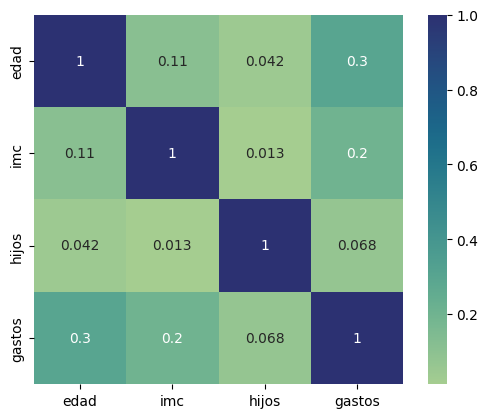

In [9]:
# Para comenzar a estudiar la relación entre los atributos y la variable objetivo podemos calcular la correlación
matriz_corr=data.corr(method="pearson")
print(matriz_corr)

# Graficamente la correlaciónn:
sns.heatmap(matriz_corr,square=True,cmap="crest",annot=True)

A partir de los valores de la correlación podemos ver cuales son los atributos (no categóricos) que más se relacionan con el target. La "edad" es el atributo que más valor de correlación tiene con la variable de respuesta, seguida del "imc" y el numero de "hijos". 

De igual manera podemos ver que tanto se relacionan los atributos entre ellos, esto nos sirve para saber que tanto expresa un atributo del otro en función del valor de correlación entre estos, de esta manera, de ser necesario, es posible eliminar atributos para construir un modelo más simple.

En la gráfica se muestran las mismas correlaciones a partir de colores, es decir, colores mas claros significan una correlación baja y colores más oscuros una correlación más alta.

Si realizamos una gráfica de dispersión para ver como en función de un atributo se explica la variable de respuesta, y=f(x). Siendo que nos encontramos en un problema de regresión, deberíamos esperar que la gráfica de dispersión pueda ajustarse linealmente.

Text(0, 0.5, 'Gastos')

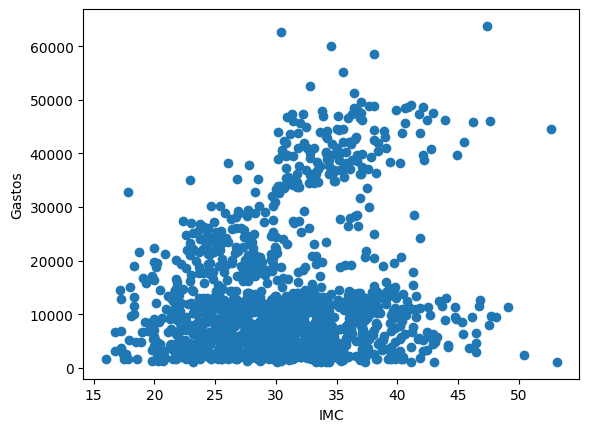

In [10]:
# Gráfica de dispersión de los gastos en función del imc
plt.plot(data.imc,data.gastos,"o")
plt.xlabel("IMC")
plt.ylabel("Gastos")

De la gráfica de dispersión podemos ver que no muestra que los datos puedan ajustarse a una relación lineal, esto podía inferirse directamente de los coeficientes de correlación, ya que entre el atributo "imc" y el target "gastos" se tiene un valor de correlación de 0.2, esto nos dice que se encuentran ligeramente o poco relacionados ya que su valor está cerca del 0, y para que en el gráfico de dispersión se logre ver una relación más lineal el coeficiente de correlación debe ser más alto. Además de que la variable de respuesta se encuentra sesgada hacia la izquierda, por lo tanto también afecta a la correlación que hay entre esta y las demás variables o atributos.

Por lo tanto debemos tener en consideración la distribución de los datos de la variable de respuesta, ya que uno de los supuestos de los problemas de regresión es que la variable de respuesta debe mostrar una distribución normal, es decir, la distribución de los datos debe ser simétrica  sobre la media y la mediana.

Para hacer esto podemos aplicar la función logaritmo a la variable de respuesta y ver su comportamiento.



In [11]:
# Generalmente funciona el logaritmo, pero hay mas transformaciones como box-cox
Y_log=np.log(data.gastos)   

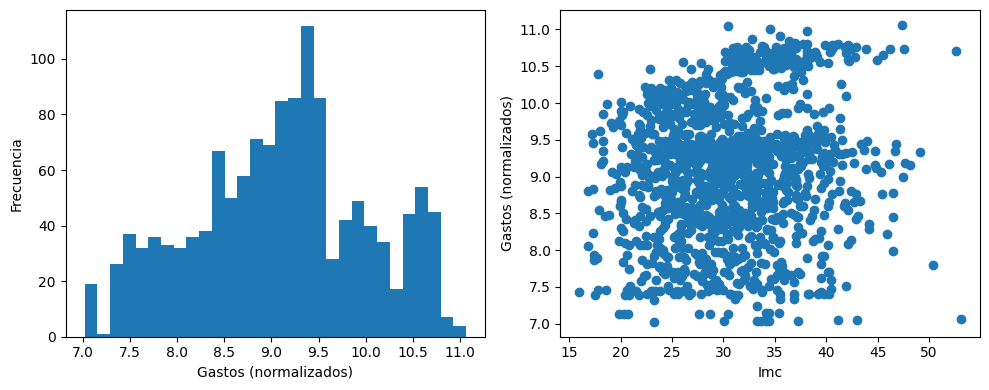

In [12]:
# Distribución de los gastos medicos (Escala logarítmica - Con una distribución normal)
# y gráfica de dispersión de los gastos normalizados en función del imc.

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(Y_log,bins=30)
plt.xlabel("Gastos (normalizados)")
plt.ylabel("Frecuencia")

plt.subplot(1,2,2)
plt.plot(data.imc,Y_log,"o")
plt.xlabel("Imc")
plt.ylabel("Gastos (normalizados)")

plt.tight_layout()
plt.show()

Podemos observar que ahora la distribución de la variable de respuesta tiene una distribución aproximadamente normal.

Y vemos que ahora la gráfica de dispersión muestra un comportamiento el cual puede ajustarse de mejor manera a una relación lineal, ya que los datos se encuentran mas dispersos.

### Variables categóricas: 
Ahora, para las variables categóricas "sexo", "fumador" y "region" debemos convertirlas a tipo numéricas, es decir, se deben crear variables binarizadas (variables dummies), teniendo en cuenta que se debe eliminar la primer columna de cada variable dummie creada, esto es para evitar que las variables creadas tengan una relación lineal entre ellas, a esto se le conoce como problema de correlación.


In [13]:
# Separamos el target (Y_log) de los atributos
del data["gastos"]

# Las columnas restantes forman los atributos
X=pd.get_dummies(data,drop_first=True) # Eliminamos la primer columna de cada variable dummie creada,
                                       # así no habrá una correlación entre los datos.
X

,edad,imc,hijos,sexo_male,fumador_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,0,1,0,0,1
1,18,33.8,1,1,0,0,1,0
2,28,33.0,3,1,0,0,1,0
3,33,22.7,0,1,0,1,0,0
4,32,28.9,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,31.0,3,1,0,1,0,0
1334,18,31.9,0,0,0,0,0,0
1335,18,36.9,0,0,0,0,1,0
1336,21,25.8,0,0,0,0,0,1


<hr style="color:blue">

# <center> <span style="color:blue"> Regresión Lineal

<hr span style="color:blue">


La regresión lineal es una técnica estadística utilizada para modelar la relación que hay entre una o más variables predictoras independientes (atributos) y una variable de respuesta dependiente (target). Este modelo asume que la relación entre estas variables es como su nombre dice "lineal", es decir, puede ser representada por una linea recta , por lo tanto, el objetivo es encontrar la linea que mejor ajuste a los datos observados y a partir de esta, utilizarla para realizar predicciones.

Para poder utilizar correctamente este modelo, se establecen algunas características, las cuales se deben cumplir para poder modelar correctamente:
 - Linealidad: Se asume que la relación entre la variable dependiente y las independientes debe ser lineal, es decir, no hay términos cuya potencia sea distinta de 1.

 -  Independencia lineal: Se asume que las variables independientes (atributos) no están relacionadas entre si.

 - Normalidad: Se asume que la variable de respuesta debe seguir una distribución normal (de campana de Gauss).

Por lo tanto, tomando estas características como las más importantes podemos proceder con el modelo de regresión lineal:


In [14]:
# Definimos el modelo a entrenar, en este caso una Regresión Lineal
modeloRL=LinearRegression()

# Definimos el esquema de validación cruzada
cv=RepeatedKFold(n_splits=10,n_repeats=50,random_state=1234)

# Guardamos los valores de las métricas de desempeño del modelo (n_splits * n_repeats)
scores=cross_val_score(modeloRL,X,Y_log,scoring="neg_root_mean_squared_error",cv=cv,n_jobs=-1)      # Scoring es la métrica de desempeño a utilizar     
                                                                                                    # También puede ser usado el scoring neg_mean_squared_error, neg_mean_absolute_error
print(f"La métrica de desempeño promedio es: {-scores.mean():.4}")
print(f"La desviación estandar es: +/- {scores.std():.4}")

La métrica de desempeño promedio es: 0.4437
La desviación estandar es: +/- 0.04651


A partir de un modelo de regresión lineal obtenemos 500 valores de la métrica de desempeño, esto se calcula a partir del número de particiones de los datos (n_splits) multiplicado por el número de repeticiones (n_repeats). Estos valores se calculan a partir de 3 métricas distintas para observar la diferencia entre estas y elegir la que muestre el valor promedio mas alto. 

Utilizando "neg_root_mean_squared_error" se tiene:
 - <span style="color:green"> La métrica de desempeño promedio es: 0.4437
 - <span style="color:green"> La desviación estándar es: +/- 0.04651

Utilizando "neg_mean_squared_error" se tiene:
 - <span style="color:green"> La métrica de desempeño promedio es: 0.1991
 - <span style="color:green"> La desviación estándar es: +/- 0.04162

Utilizando "neg_mean_absolute_error" se tiene:
 - <span style="color:green"> La métrica de desempeño promedio es: 0.28
 - <span style="color:green"> La desviación estándar es: +/- 0.02824

 Podemos ver que la mejor métrica de desempeño promedio se obtiene al utilizar "neg_root_mean_squared_error".

 Para poder saber que tan bien se ajusta el modelo entrenado a los datos observados hacemos las predicciones. Y a partir de esto se hace un gráfico comparativo de las distribuciones.

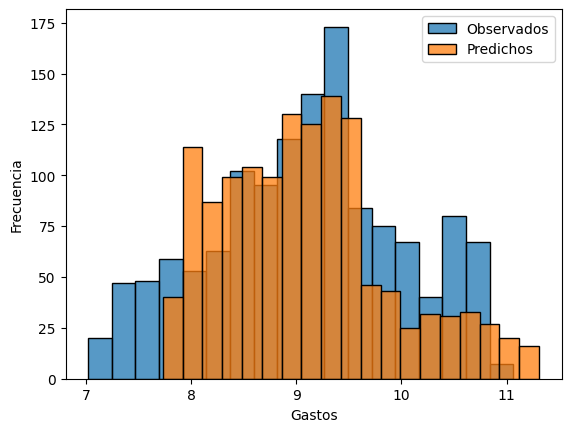

In [15]:
# Ya que se tiene el desempeño predictivo del modelo, podemos entrenarlo empleando todos los datos
modeloRL.fit(X,Y_log)

# Realizamos las predicciones
Y_pred=modeloRL.predict(X)

# Gráfica de las comparaciones de las distribuciones de los datos
sns.histplot(Y_log,label="Observados")
sns.histplot(Y_pred, label="Predichos")
plt.ylabel("Frecuencia")
plt.xlabel("Gastos")
plt.legend()

A partir del gráfico podemos observar que para valores centrales el modelo hace buenas predicciones, mientras que para valores bajos no logra hacer las predicciones, y para valores altos las predicciones se quedan cortas en comparación con los datos observados.

Otra manera de ver esta misma comparación es mediante un gráfico de dispersión:

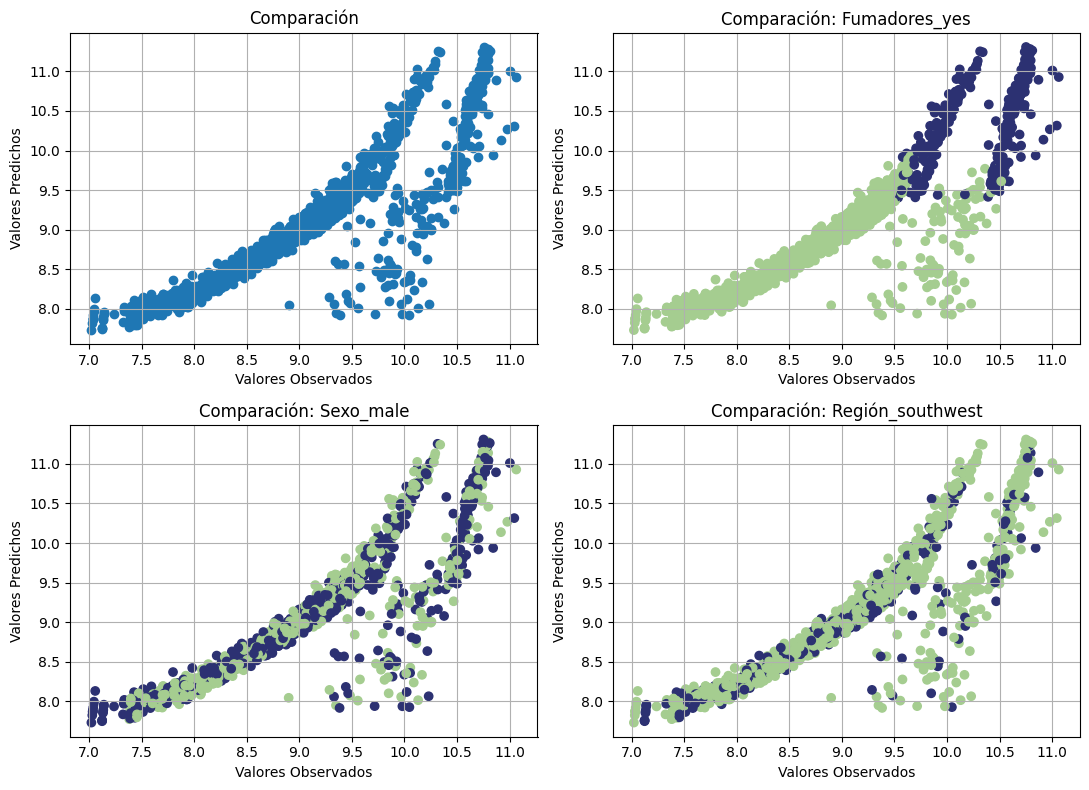

In [16]:
# Gráficas de dispersión comparativa de valores observados vs predichos, y la identificación de los atributos 
plt.figure(figsize=(11,8))

plt.subplot(2,2,1)
plt.xlabel("Valores Observados")
plt.ylabel("Valores Predichos")
plt.title("Comparación")
plt.scatter(Y_log,Y_pred)
plt.grid()

plt.subplot(2,2,2)
plt.xlabel("Valores Observados")
plt.ylabel("Valores Predichos")
plt.scatter(Y_log,Y_pred,c=X.fumador_yes,cmap="crest")
plt.title("Comparación: Fumadores_yes")
plt.grid()

plt.subplot(2,2,3)
plt.xlabel("Valores Observados")
plt.ylabel("Valores Predichos")
plt.scatter(Y_log,Y_pred,c=X.sexo_male,cmap="crest")
plt.title("Comparación: Sexo_male")
plt.grid()

plt.subplot(2,2,4)
plt.xlabel("Valores Observados")
plt.ylabel("Valores Predichos")
plt.scatter(Y_log,Y_pred,c=X.region_southwest,cmap="crest")
plt.title("Comparación: Región_southwest")
plt.grid()

plt.tight_layout()
plt.show()

Por medio de la rejilla en las gráficas podemos observar de una mejor manera la diferencia que hay entre los valores verdaderos (Observados) y los valores predichos al hacer un análisis por cuadrantes.

Podemos observar que en algunos cuadrantes el modelo falla en identificarlos de manera correcta, mientras que en otros cuadrantes los identifica bien, tal y como se mostró en el gráfico anterior de las distribuciones. Además de que en las otras tres gráficas, de manera más notable podemos ver los gastos de acuerdo a las categorías, donde el color fuerte marca a la categoría del título del gráfico y el color tenue indica el complemento de la categoría. Gracias a esto, vemos directamente que los fumadores son aquellos en los que el gasto es más alto.


Ahora que hemos visto el comportamiento de las predicciones del modelo vs los datos observados sería bueno conocer todos los parámetros que calculó el modelo, lo cual puede observarse de la siguiente manera:

In [17]:
# Importamos la librería  para mostar el modelo
import statsmodels.formula.api as smf

# Agregamos la variable de respuesta de nuevo al DataFrame para utilizarla.
X["log_gastos"]=Y_log
modeloRL=smf.ols(formula="log_gastos~edad+imc+hijos+sexo_male+fumador_yes+region_northwest+region_southeast+region_southwest",
                 data=X).fit()

# Se elimina nuevamente a la variable log_gastos, para tener solo los atributos
del X["log_gastos"]

# Imprimimos el modelo
print(modeloRL.summary())

                            OLS Regression Results                            
Dep. Variable:             log_gastos   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     549.7
Date:                Wed, 29 Mar 2023   Prob (F-statistic):               0.00
Time:                        12:19:53   Log-Likelihood:                -808.54
No. Observations:                1338   AIC:                             1635.
Df Residuals:                    1329   BIC:                             1682.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            7.0308      0.072  

## <span style="color:blue"> Interpretación de los coeficientes:
Como la variable de respuesta está transformada, entonces la interpretación de los coeficientes se hace en términos de crecimiento porcentual. Por ejemplo, edad, el valor de coeficiente es 0.0346, entonces para dos asegurados donde el asegurado1 es un año más grande que el asegurado2 y podemos considerar que en el resto de los atributos son idénticos. Del modelo de regresión podemos deducir que gasto(asegurado1) = exp(0.0346)gasto(asegurado2).

De una manera más sencilla, podemos calcular unicamente el exponencial del coeficiente, teniendo en cuenta que se le debe restar uno (exp(coef)-1) esto debido a que así obtendremos el porcentaje de aumento en los gastos.

Para aquellos valores negativos de los coeficientes darán como resultado un valor negativo en el porcentaje de aumento en los gastos, esto indica que ese porcentaje de gastos es menor para el valor de esa categoría en comparación con la categoría que tomamos como referencia en las variables dummies.

Interpretación del coeficiente edad:

 - <span style="color:green"> Por cada año más de edad, en promedio el gasto en servicios médicos de la aseguradora aumentan en en 3.5%.

Interpretación del coeficiente imc:

 - <span style="color:green"> Por cada unidad más de imc, en promedio el gasto en servicios médicos de la aseguradora aumentan en en 1.3%.

Interpretación del coeficiente hijos:
 - <span style="color:green"> Por cada hijos más que tenga el asegurado, el gasto en servicios médicos de la aseguradora aumentan en promedio 10.7%.

Interpretación del coeficiente sexo_male:
 - <span style="color:green"> En promedio, los gastos de la aseguradora en un hombre son 7.3% menos que los gastos de la aseguradora en mujeres. 

Interpretación del coeficiente fumador_yes:
 - <span style="color:green"> En promedio, los gastos de la aseguradora en un asegurado que fuma son 3.73 veces más grande que el gasto en un asegurado que no fuma.

Interpretación del coeficiente region_northwest:
 - <span style="color:green"> En promedio, los gastos de la aseguradora en un asegurado que vive en la region noroeste son 6.18% menores al gasto de un asegurado que vive en la región noreste (valor testigo).

Interpretación del coeficiente region_southhwest:
 - <span style="color:green"> En promedio, los gastos de la aseguradora en un asegurado que vive en la region suroeste son 12.09% menores al gasto de un asegurado que vive en la región noreste (valor testigo).

Ya hemos realizado un ajuste de un modelo de regresión lineal empleando todos los atributos calculando distintas métricas de desempeño y realizando la interpretación de los coeficientes. Ahora aplicaremos el principio de parsimonia para el modelo, es decir, debemos reducir el modelo (eliminando atributos) de manera que este obtenga una buena métrica de desempeño y haga buenas predicciones. 

Por lo tanto, debemos hacer una selección de atributos, los cuales dependerán de que tan representativos resultan para el modelo de regresión lineal.

In [18]:
from mlxtend.feature_selection import SequentialFeatureSelector

# Modelo 
RLineal_reduc=LinearRegression()

# Llamar al Método: Backward. 
sfs=SequentialFeatureSelector(RLineal_reduc,k_features=7,scoring="neg_root_mean_squared_error",forward=False,cv=cv,n_jobs=-1)

#Ajustamos el método
sfs.fit(X,Y_log)

SequentialFeatureSelector(cv=RepeatedKFold(n_repeats=50, n_splits=10, random_state=1234),
                          estimator=LinearRegression(), forward=False,
                          k_features=(7, 7), n_jobs=-1,
                          scoring='neg_root_mean_squared_error')

En el modelo de Regresión Lineal entrenado se seleccionaron 4 atributos (k_features) para comenzar a probar y una métrica de desempeño "neg_root_mean_squared_error", además de utilizar la misma validación cruzada definida en el modelo anterior. Por lo tanto, al entrenar el modelo obtenemos los 4 atributos que mejor describen al modelo, podemos ver cuales son, así como la métrica de desempeño obtenida:

In [19]:
# Cuáles son los atributos seleccionados
print(f"Los atributos seleccionados para el modelo reducido son: {sfs.k_feature_names_}")

# Cuál es la métrica de desempeño
print(f"La métrica de desempeño del modelo reducido es: {-sfs.k_score_:.4}")

Los atributos seleccionados para el modelo reducido son: ('edad', 'imc', 'hijos', 'sexo_male', 'fumador_yes', 'region_southeast', 'region_southwest')
La métrica de desempeño del modelo reducido es: 0.4439


Con 4 atributos se obtuvo:
 - <span style="color:green">Los atributos seleccionados para el modelo reducido son: ('edad', 'imc', 'hijos', 'fumador_yes')
 - <span style="color:green">La métrica de desempeño del modelo reducido es: 0.4478

Con 3 atributos se obtuvo:
- <span style="color:green">Los atributos seleccionados para el modelo reducido son: ('edad', 'hijos', 'fumador_yes')
- <span style="color:green">La métrica de desempeño del modelo reducido es: 0.452

Con 2 atributos se obtuvo:
- <span style="color:green">Los atributos seleccionados para el modelo reducido son: ('edad', 'fumador_yes')
- <span style="color:green">La métrica de desempeño del modelo reducido es: 0.4682

Con 5 atributos se obtuvo:
- <span style="color:green">Los atributos seleccionados para el modelo reducido son: ('edad', 'imc', 'hijos', 'fumador_yes', 'region_southeast')
- <span style="color:green">La métrica de desempeño del modelo reducido es: 0.4465

Con 6 atributos se obtuvo:
- <span style="color:green">Los atributos seleccionados para el modelo reducido son: ('edad', 'imc', 'hijos', 'fumador_yes', 'region_southeast', 'region_southwest')
- <span style="color:green">La métrica de desempeño del modelo reducido es: 0.4451

Con 7 atributos se obtuvo:
- <span style="color:green">Los atributos seleccionados para el modelo reducido son: ('edad', 'imc', 'hijos', 'sexo_male', 'fumador_yes', 'region_southeast', 'region_southwest')
- <span style="color:green">La métrica de desempeño del modelo reducido es: 0.4439

Por lo que podemos ver, el modelo con el mejor desempeño predictivo es el que solamente cuenta con dos atributos: "edad" y "fumador_yes", ya que este obtuvo la métrica de desempeño más alta.

A partir de esto realizamos la selección de un submodelo más simple, y vemos que tal describe los datos originales.


## <span style="color:blue">Seleccion de un submodelo

In [20]:
# Ya que tenemos los atributos necesarios, verificamos nuevamente los parámetros de este al entrenarse.

# Volvemos a agregar la variable de respuesta al DataFrame 
X["log_gastos"]=Y_log

# Definimos el modelo y lo entrenamos
modeloRL_reducido=smf.ols(formula="log_gastos~edad+fumador_yes",data=X).fit()

# Eliminamos nuevamente el target del DataFrame de los atributos
del X["log_gastos"]
print(modeloRL_reducido.summary())

                            OLS Regression Results                            
Dep. Variable:             log_gastos   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     1895.
Date:                Wed, 29 Mar 2023   Prob (F-statistic):               0.00
Time:                        12:19:55   Log-Likelihood:                -885.76
No. Observations:                1338   AIC:                             1778.
Df Residuals:                    1335   BIC:                             1793.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.3839      0.039    190.373      

Ahora con el modelo reducido ya entrenado, podemos hacer las predicciones y comparar la distribución de estos valores predichos vs los valores observados:

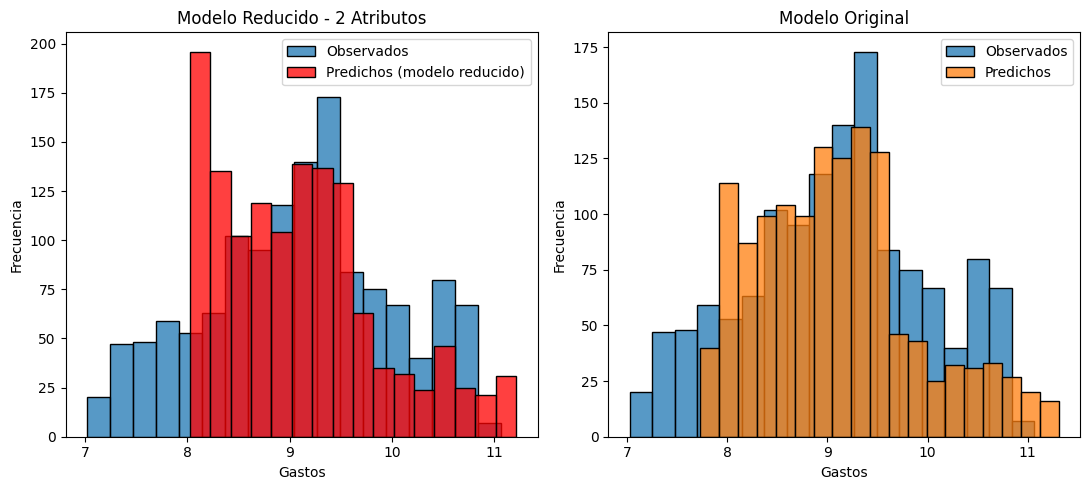

In [21]:
# Predicciones del modelo reducido
Y_pred_redu=modeloRL_reducido.predict(X)

# Gráficas de las comparaciones de las distribuciones de los datos

plt.figure(figsize=(11,5))

plt.subplot(1,2,1)
sns.histplot(Y_log,label="Observados")
sns.histplot(Y_pred_redu, label="Predichos (modelo reducido)",color="red")
plt.ylabel("Frecuencia")
plt.xlabel("Gastos")
plt.title("Modelo Reducido - 2 Atributos")
plt.legend()

plt.subplot(1,2,2)
sns.histplot(Y_log,label="Observados")
sns.histplot(Y_pred, label="Predichos")
plt.ylabel("Frecuencia")
plt.xlabel("Gastos")
plt.title("Modelo Original")
plt.legend()

plt.tight_layout()
plt.show()

Podemos observar claramente que la diferencia entre ambos modelos es muy poca en torno a los valores de los gastos centrales, mientras que los cambios más notables se dan en los extremos, ya que el nuevo modelo reducido tampoco predice valores de gastos bajos y además sobreestima los valores mínimos predichos, mientras que subestima los valores de gastos más altos. Esto quiere decir que ambos modelos hacen aproximadamente el mismo ajuste, y ya que el modelo reducido hace uso de menos atributos es por lo tanto más eficiente en tiempo computacional.

<center>
<hr style="color:blue">

# <span style="color:blue"> Métedos de regularización

<hr style="color:blue">
</center>

## <span style="color:blue"> Regularización Ridge

Se hace uso de la regularización Ridge para prevenir el sobreajuste del modelo de Regresión Lineal, teniendo como objetivo principal la reducción de los coeficientes de los atributos que encontramos en el modelo anterior hacia el valor 0, sin ser cero completamente, esto se logra a partir de agregar una penalización a la función de costo ( costo= suma de los cuadrados de los errores + $\lambda$*suma de los cuadrados de los coeficientes) por medio de un hiperparámetro $\lambda$ (alpha). Este hiperparámetro controla el grado de penalización de los atributos, por lo tanto, al aumentar el valor de alpha aumenta el grado de penalización y por lo tanto los coeficientes tienden mas a cero, dando así un modelo más simple, pero teniendo en cuenta que si el valor es demasiado alto puede llevar a un modelo subajustado, mientras que valores pequeños pueden llevar al sobreajuste del modelo.

Para saber cuál es el mejor valor del hiperparámetro alpha hacemos una búsqueda por rejilla, esto es, realizar una calibración del modelo con multiples valores de alpha, para tratar de encontrar el que de como resultado la mejor métrica de desempeño. Además debemos tener en cuenta que para hacer esta búsqueda se deben tener todos los datos en la misma escala, por lo tanto debemos hacer un preprocesamiento a partir de un Pipeline:

In [55]:
# Construimos el espacio de parametros
alphas=np.logspace(-5,5,10)   # La penalización sobre la suma de los cuadrados de los coeficientes
                              # Generamos 10 números igualmente espaciados en una escala logarítmica

espacio_param={"ridge__alpha":alphas}

# Pipeline: Escalamiento de los datos y modelo a aplicar
PipeRidge=make_pipeline(MinMaxScaler(),Ridge())

# Realizamos la busqueda por la rejilla
rejillaRidge=GridSearchCV(PipeRidge,param_grid=espacio_param,scoring="neg_root_mean_squared_error",cv=cv,n_jobs=-1)
rejillaRidge.fit(X,Y_log)

# Imprimimos los resultados
print(f"El mejor hiperparametro alpha: {rejillaRidge.best_params_}")
print(f"El mejor valor de la métrica: {-rejillaRidge.best_score_}")

El mejor hiperparametro alpha: {'ridge__alpha': 0.021544346900318846}
El mejor valor de la métrica: 0.44372560682783163


Con un escalamiento MinMaxScaler tenemos:
 - <span style="color:green">El mejor hiperparámetro alpha: {'ridge__alpha': 0.021544346900318846}
 - <span style="color:green">El mejor valor de la métrica: 0.44372560682783163

Con un Escalamiento StandardScaler tenemos:
 - <span style="color:green">El mejor hiperparámetro alpha: {'ridge__alpha': 1e-05}
 - <span style="color:green">El mejor valor de la métrica: 0.4437256818720136

 Vemos que las métricas de desempeño son prácticamente iguales, mientras que para los valores de alpha la diferencia es más notable, ya que esta depende directamente de la estrategia empleada para la estandarización, y debido a que la métrica de desempeño es aproximadamente igual, se espera que ambos modelos tengan predicciones muy similares, por lo tanto utilizando cualquiera obtendremos el mismo resultado.

Ahora con el valor del hiperparámetro calculado, podemos ajustar el modelo, entrenarlo y hacer las predicciones, sin olvidar que al entrenarlo se deben reescalar los datos:

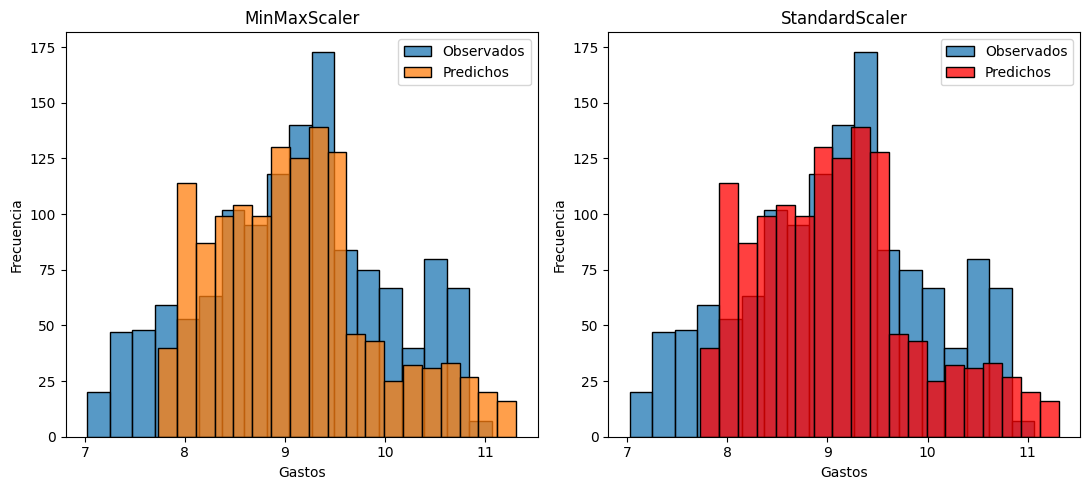

In [56]:
# Definimos el modelo
modelo_ridge1=Ridge(alpha=0.02154)
modelo_ridge2=Ridge(alpha=1e-05)

# Entrenamos el modelo: Reescalando antes los datos
modelo_ridge1.fit(MinMaxScaler().fit_transform(X),Y_log)
modelo_ridge2.fit(StandardScaler().fit_transform(X),Y_log)

# Hacemos las predicciones
prediccionesRidge1=modelo_ridge1.predict(MinMaxScaler().fit_transform(X))
prediccionesRidge2=modelo_ridge2.predict(StandardScaler().fit_transform(X))

# Gráficas comparativa de las distribuciones
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
sns.histplot(Y_log,label="Observados")
sns.histplot(prediccionesRidge1, label="Predichos")
plt.ylabel("Frecuencia")
plt.xlabel("Gastos")
plt.title("MinMaxScaler")
plt.legend()

plt.subplot(1,2,2)
sns.histplot(Y_log,label="Observados")
sns.histplot(prediccionesRidge2, label="Predichos",color="red")
plt.ylabel("Frecuencia")
plt.xlabel("Gastos")
plt.title("StandardScaler")
plt.legend()

plt.tight_layout()
plt.show()

Como era de esperar, el ajuste de ambos modelos es prácticamente igual, ajustandose bien a los gastos centrales y mal a los gastos bajos y altos, por lo tanto el uso de MinMaxScaler o StandardScaler en este caso es indistinto.

Podemos observar los valores de los coeficientes que arroja la penalización del modelo mediante el parámetro alpha:

In [60]:
# Término independiente del modelo
print(f"Termino independiente: {modelo_ridge1.intercept_}")

# Creamos un Dataframe Para guardar los valores de los coeficientes
Coeficientes=pd.DataFrame()
Coeficientes["coef"]=X.columns
Coeficientes["Regresión Ridge MinMaxScaler"]=modelo_ridge1.coef_
Coeficientes["Regresión Ridge StandardScaler"]=modelo_ridge2.coef_
Coeficientes["Regresión Lineal"]=[0.0346,0.0134,0.1019,-0.0754,1.5543,-0.0638,-0.1572,-0.1289]
Coeficientes

Termino independiente: 7.86735413805111


,coef,Regresión Ridge MinMaxScaler,Regresión Ridge StandardScaler,Regresión Lineal
0,edad,1.590495,0.485688,0.0346
1,imc,0.495587,0.081479,0.0134
2,hijos,0.509202,0.122752,0.1019
3,sexo_male,-0.075395,-0.037703,-0.0754
4,fumador_yes,1.554117,0.627218,1.5543
5,region_northwest,-0.063755,-0.027351,-0.0638
6,region_southeast,-0.157096,-0.069941,-0.1572
7,region_southwest,-0.128863,-0.055279,-0.1289


En el DataFrame podemos ver la comparación entre los valores de los coeficientes cuando se aplica la penalización y la estandarización.

## <span style="color:blue"> Regularización Lasso

Al igual que con la regularización Ridge, la regresión Lasso previene el sobreajuste del modelo al reducir los coeficientes de los atributos que no contribuyen significativamente al agregar una penalización a la función de costo por medio de un hiperparámetro alpha. Esta penalización lleva a cero algunos de los coeficientes de los atributos, dando como resultado un modelo reducido, por lo tanto es útil para saber cuales coeficientes son más relevantes que otros, principalmente cuando hay demasiados atributos.

De igual manera se necesita calibrar el mejor valor del hiperparámetro alpha por medio de una búsqueda por rejilla y a través de un reescalamiento de los datos:

In [64]:
# Construimos el espacio de parametros
alphas=np.logspace(-5,5,10)   # La penalización sobre la suma de los cuadrados de los coeficientes
                              # Buscamos entre los valores dados en la lista

espacio_param={"lasso__alpha":alphas}

# Pipeline: Escalamiento de los datos y modelo a aplicar
PipeLasso=make_pipeline(StandardScaler(),Lasso())

# Realizamos la busqueda por la rejilla
rejillaLasso=GridSearchCV(PipeLasso,param_grid=espacio_param,scoring="neg_root_mean_squared_error",cv=cv,n_jobs=-1)
rejillaLasso.fit(X,Y_log)

# Imprimimos los resultados
print(f"El mejor hiperparametro alpha: {rejillaLasso.best_params_}")
print(f"El mejor valor de la métrica: {-rejillaLasso.best_score_}")

El mejor hiperparametro alpha: {'lasso__alpha': 1e-05}
El mejor valor de la métrica: 0.4437257623309976


Con un escalamiento MinMaxScaler tenemos:
 - <span style="color:green">El mejor hiperparametro alpha: {'lasso__alpha': 1e-05}
 - <span style="color:green">El mejor valor de la métrica: 0.44372592002817135

Con un escalamiento StandardScaler tenemos:
 - <span style="color:green">El mejor hiperparametro alpha: {'lasso__alpha': 1e-05}
 - <span style="color:green">El mejor valor de la métrica: 0.4437257623309976


Vemos que en ambos casos el valor del hiperparámetro alpha es igual.

Con el valor del hiperparámetro calculado, podemos ajustar el modelo, entrenarlo y hacer las predicciones

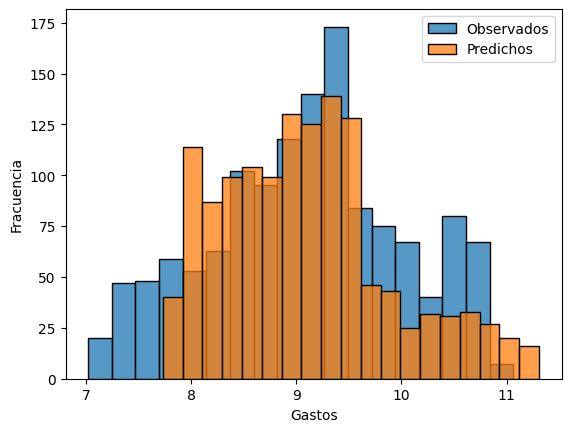

In [76]:
# Definimos el modelo
modelo_lasso=Lasso(alpha=1e-05)

# Entrenamos el modelo: Reescalando antes los datos
modelo_lasso.fit(MinMaxScaler().fit_transform(X),Y_log)

# Hacemos las predicciones
prediccionesLasso=modelo_lasso.predict(MinMaxScaler().fit_transform(X))

# Graficamos
sns.histplot(Y_log,label="Observados")
sns.histplot(prediccionesLasso, label="Predichos")
plt.ylabel("Fracuencia")
plt.xlabel("Gastos")
plt.legend()

Se muestra un comportamiento igual al de la regularización Ridge.

Comprobamos los valores de los coeficientes, agregando los valores generados en el Dataframe anterior. 

In [77]:
# Termino independiente
print(f"Termino independiente: {modelo_lasso.intercept_}")

# Agregamos los valores al dataframe
Coeficientes["Lasso MinMaxScaler"]=modelo_lasso.coef_
Coeficientes

Termino independiente: 7.8672015303237215


,coef,Regresión Ridge MinMaxScaler,Regresión Ridge StandardScaler,Regresión Lineal,Lasso MinMaxScaler
0,edad,1.590495,0.485688,0.0346,1.590679
1,imc,0.495587,0.081479,0.0134,0.495417
2,hijos,0.509202,0.122752,0.1019,0.509155
3,sexo_male,-0.075395,-0.037703,-0.0754,-0.075360
4,fumador_yes,1.554117,0.627218,1.5543,1.554210
5,region_northwest,-0.063755,-0.027351,-0.0638,-0.063612
6,region_southeast,-0.157096,-0.069941,-0.1572,-0.156951
7,region_southwest,-0.128863,-0.055279,-0.1289,-0.128720


<hr style="color:blue">

# <center><span style="color:blue"> Árbol de Regresión

<hr style="color:blue">

Un árbol de regresión funciona dividiendo recursivamente los datos en subconjuntos más pequeños y homogéneos en términos del target, esta división continúa hasta llegar a las hojas del árbol o mediante un criterio de paro. Este árbol se construye de manera que se seleccione la variable o atributo de entrada (nodo principal) que mejor divide los datos en términos de la variable de respuesta, esta división se realiza al maximizar la reducción en la varianza o la ganancia de la información.

En cada nodo del árbol se estima la variable de respuesta mediante algún método como la media o mediana de los valores en el subconjunto correspondiente, este es el proceso que se repite recursivamente para cada subconjunto hasta llegar al criterio de paro.

Algunos de los hiperparámetros del modelo son:

- max_depth: La profundidad máxima del árbol indica cuantas divisiones puede tener el árbol, este parámetro es importante ya que si no se establece una profundidad máxima, el árbol tiende a sobreajustar el modelo, y de manera inversa, si la profundidad es muy pequeña el árbol tiende a subajustar el modelo.

- min_samples_leaf: Establece el número mínimo de muestras que debe haber en una hoja o nodo terminal del árbol

- criterion: Establece el criterio que se utiliza para decidir como dividir los datos en los distintos nodos del árbol para la ganancia de información, por default toma el valor de gini, pero tambien puede ser entropy.

Con estos parámetros podemos calibrar un árbol de regresión, pero antes debemos leer nuevamente los datos, ya que para este modelo al crear las variables dummies no es necesario eliminar la primer columna ya que no hay convergencia en la solución ni se muestran problemas de matriz inversa al hacer combinación lineal de los valores.

In [162]:
# Leemos nuevamente los datos y separamos los atributos de la variable de respuesta:
data=pd.read_csv("gastos_medicos.csv")
Y=np.log(data.gastos)       # Target
del data["gastos"]
X=pd.get_dummies(data)  # Atributos y dummies

Calibramos los parámetros de máxima profundidad y mínimo número de muestras por hoja del árbol mediante una rejilla. 

In [89]:
# Espacio de parametros: Utilizamos solo 2 parámetros
espacio_param={"max_depth":np.arange(3,10,1),
               "min_samples_leaf":np.arange(5,50,2)}

# Definimos la rejilla
rejilla=GridSearchCV(DecisionTreeRegressor(),param_grid=espacio_param, scoring="neg_root_mean_squared_error",cv=cv,n_jobs=-1)
rejilla.fit(X,Y)

# Imprimimos los resultados
print(f"El mejor valor de los hiperparametros: {rejilla.best_params_}")
print(f"El mejor valor de la métrica: {-rejilla.best_score_}")

El mejor valor de los hiperparametros: {'max_depth': 6, 'min_samples_leaf': 21}
El mejor valor de la métrica: 0.3739892771639093


Como vemos en el valor de la mejor métrica de desempeño, este es algo más bajo que en los modelos anteriores, por lo tanto el modelo tiene un ajuste bajo y las predicciones son menos acertadas.

Ya con los valores de los hiperparámetros calculados, definimos y ajustamos el modelo utilizando todos los datos:

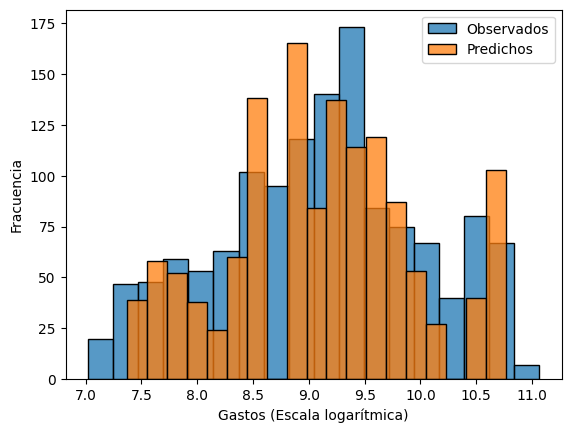

In [92]:
# Definimos el modelo
ModeloArbol=DecisionTreeRegressor(max_depth=6,min_samples_leaf=21)
ModeloArbol.fit(X,Y)

# Predicciones
Y_pred_arbol=ModeloArbol.predict(X)

# Gráfica comparativa
sns.histplot(Y,label="Observados")
sns.histplot(Y_pred_arbol, label="Predichos")
plt.ylabel("Fracuencia")
plt.xlabel("Gastos (Escala logarítmica)")
plt.legend()

Como esperábamos a partir de la métrica de desempeño, podemos ver que a valores de gastos bajos el modelo se logra ajustar muy poco, mientras que para valores centrales es un poco más preciso, sin embargo hay algunos valores a los que el modelo no logra predecir por completo, por lo tanto debemos encontrar la manera de mejorar la métrica de desempeño para lograr un mejor ajuste del modelo.

<hr style="color:blue">

# <center><span style="color:blue"> Bosques Aleatorios

<hr style="color:blue">

Los bosques aleatorios utilizan conjuntos de árboles de decisión o regresión para mejorar la precisión del modelo, cada árbol se construye utilizando un subconjunto aleatorio de los datos de entrenamiento y un subconjunto aleatorio de los atributos, es decir, no le damos a cada árbol los mismos datos ni los mismos atributos, así, se logra reducir el sobreajuste además de que el modelo generaliza de una mejor manera los datos nuevos. Para esto, cada uno de los árboles que genera el modelo genera una predicción, y la predicción final del modelo de regresión se calcula mediante la media de las predicciones de todos los árboles.

Comenzamos realizando una calibración con 10 árboles, realizando una búsqueda por rejilla para los parámetros del modelo anterior para cada árbol.

In [97]:
# Calibrar el bosque con 10 árboles

# Espacio de parametros
espacio_param={"max_depth":np.arange(3,10,1),
               "min_samples_leaf":np.arange(5,50,2)}

# Definimos la rejilla
rejilla=GridSearchCV(RandomForestRegressor(n_estimators=10),param_grid=espacio_param, scoring="neg_root_mean_squared_error",cv=cv,n_jobs=-1)
rejilla.fit(X,Y)

# Imprimimos los resultados
print(f"El mejor valor de los hiperparametros: {rejilla.best_params_}")
print(f"El mejor valor de la metrica: {-rejilla.best_score_}")

El mejor valor de los hiperparametros: {'max_depth': 6, 'min_samples_leaf': 15}
El mejor valor de la metrica: 0.36870411706988954


Con los valores de los hiperparámetros calculados, definimos y entrenamos el modelo final:

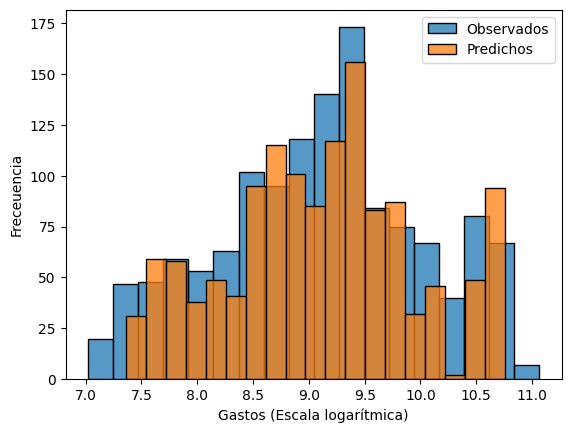

In [118]:
# Definimos el modelo
modelo_bosque=RandomForestRegressor(n_estimators=10,max_depth=6,min_samples_leaf=15)

# Entrenamos el modelo
modelo_bosque.fit(X,Y)

# Hacemos las predicciones
Y_predic_bosque=modelo_bosque.predict(X)

# Graficamos
sns.histplot(Y,label="Observados")
sns.histplot(Y_predic_bosque, label="Predichos")
plt.ylabel("Freceuencia")
plt.xlabel("Gastos (Escala logarítmica)")
plt.legend()


A partir de la métrica de desempeño del modelo podemos ver que el ajuste no es el más óptimo, ademas de que incluso es menor que en modelo de un solo árbol, pero esto puede ser por el numero de árboles en el bosque, por lo tanto, podemos establecer una forma de encontrar un valor de árboles que logren ajustar mejor al modelo. Para esto utilizamos el Out-of-bag score (OOB).

El OOB mide la precisión del bosque aleatorio utilizando las muestras que no se incluyeron en la construcción de un árbol, de manera que, para cada árbol en el bosque es posible calcular los errores de las muestras que no se utilizaron para su construcción. Por lo tanto, a partir de esto podemos encontrar el número de árboles que ajusta mejor al modelo.

Para ver de manera gráfica como el número de árboles afecta al desempeño del modelo creamos un DataFrame en donde guardaremos los valores obtenidos para cada número de árboles. El parámetro que se debe agregar es "oob_score=True" en el modelo.

In [110]:
# Número de árboles
n_trees=np.arange(50,2000,10)
oob_score=[]

for i in n_trees:
    modelo=RandomForestRegressor(n_estimators=i,max_depth=6,min_samples_leaf=15,oob_score=True)
    modelo.fit(X,Y)
    oob_score.append(modelo.oob_score_)     # Guardamos los valores en una lista

# Creamos el DataFrame
error_OOB=pd.DataFrame()
error_OOB["Numero de arboles"]=n_trees
error_OOB["error OOB"]=oob_score

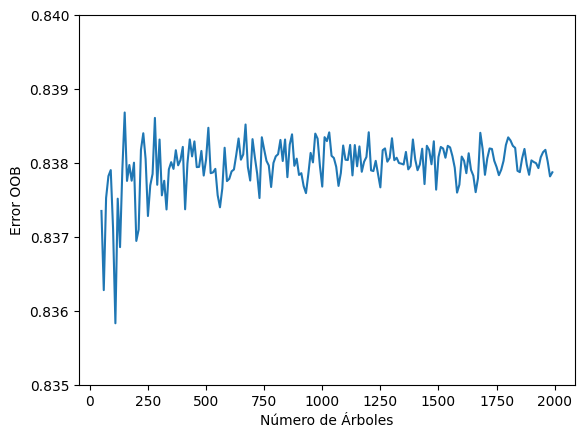

In [115]:
# Gráfica del número de árboles
plt.plot(error_OOB["Numero de arboles"],error_OOB["error OOB"])
plt.ylim(0.8350,0.840)
plt.ylabel("Error OOB")
plt.xlabel("Número de Árboles")
plt.show()

Como podemos ver, cuando tenemos pocos árboles el error oscila mucho, y aproximadamente al rededor de 300 a 500 árboles el error oscila al rededor de un valor, por lo tanto, este sería un número óptimo para el modelo.

Entonces, ahora vemos el comportamiento del modelo con estos valores:

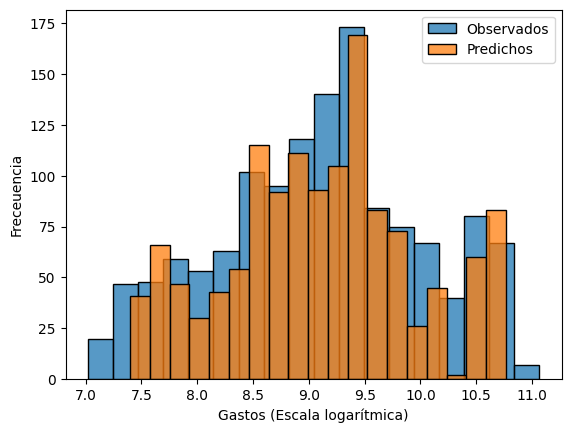

In [123]:
# Definimos el modelo
modelo_bosque=RandomForestRegressor(n_estimators=400,max_depth=6,min_samples_leaf=15)

# Entrenamos el modelo
modelo_bosque.fit(X,Y)

# Hacemos las predicciones
Y_predic_bosque_n=modelo_bosque.predict(X)

# Graficamos
sns.histplot(Y,label="Observados")
sns.histplot(Y_predic_bosque_n, label="Predichos")
plt.ylabel("Freceuencia")
plt.xlabel("Gastos (Escala logarítmica)")
plt.legend()

Vemos que este modelo logra un mejor ajuste con los datos observados, mientras que prevenimos el sobreajuste.

También podemos ver cuales de los atributos son los mas importantes para el desempeño predictivo del modelo, para ello creamos otro DataFrame con los atributos y los valores de la importancia de cada uno de estos.

In [124]:
# Importancia de los atributos
nombres=X.columns
imp_pred=pd.DataFrame()
imp_pred["Nombre"]=nombres
imp_pred["Importancia"]=modelo_bosque.feature_importances_
imp_pred.sort_values("Importancia",ascending=True)

,Nombre,Importancia
10,region_southwest,0.000418
9,region_southeast,0.000707
8,region_northwest,0.000796
4,sexo_male,0.002348
3,sexo_female,0.002625
7,region_northeast,0.004679
1,imc,0.037473
2,hijos,0.037485
5,fumador_no,0.157463
6,fumador_yes,0.358563


<hr style="color:blue">

# <center><span style="color:blue">XGBoosting

<hr style="color:blue">

El XGBoost (Extreme Gradient Boosting) es una técnica de ensamble que va construyendo modelos de manera secuencial, es decir, cada modelo busca corregir los errores del modelo anterior, esta técnica de ensamble es mucho más util en modelos débiles, tales como los árboles de regresión. Por lo tanto, el modelo combina múltiples modelos de árboles de regresión para crear así un modelo de predicción más fuerte y preciso.

Algunos de los hiperparámetros que podemos utilizar con el modelo son:
 - n_estimators: Nos indica el número de árboles de decisión que ajustará el modelo.

 - learning_rate: Indica la tasa o ratio de aprendizaje que se utiliza en cada iteración del modelo, de manera que, para valores altos se tiene una convergencia rápida pero también puede llevar al sobreajuste, y valores bajos llevan a una convergencia lenta (más tiempo de procesamiento) pero ayuda a evitar el sobreajuste.

Tomando en consideración los parámetros del bosque calibrado anteriormente, y con un parámetro de ratio de aprendizaje bajo "learning_rate" ya que los valores maás utilizados son de 0.1 a 0.1, este valor al ser bajo converge más lentamente,  pero genera una mayor presición, de esta manera evitamos el sobreajuste.

La métrica de desempeño promedio es: 0.4331


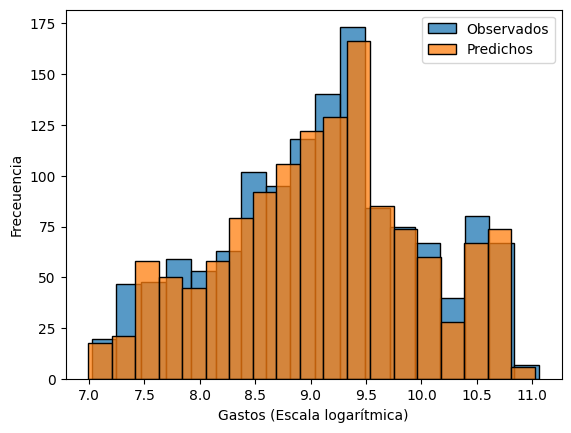

In [175]:
# Importamos la librería
from xgboost import XGBRegressor

# Definimos el modelo
modelo_xgb=XGBRegressor(n_estimators=400,max_depth=6,learning_rate=0.1)
                        # Omitimos el parámetro min_samples_leaf ya que no se utiliza
                        
# Guardamos los valores de las métricas de desempeño del modelo (n_splits * n_repeats)
scores=cross_val_score(modelo_xgb,X,Y,scoring="neg_root_mean_squared_error",cv=cv,n_jobs=-1)

# Imprimimos los resultados
print(f"La métrica de desempeño promedio es: {-scores.mean():.4}")

# Hacemos las predicciones
modelo_xgb.fit(X,Y)
Y_predic_xgb=modelo_xgb.predict(X)

# Graficamos
sns.histplot(Y,label="Observados")
sns.histplot(Y_predic_xgb, label="Predichos")
plt.ylabel("Freceuencia")
plt.xlabel("Gastos (Escala logarítmica)")
plt.legend()


Como podemos ver, este modelo es el que mejor se logra ajustar a los datos observados de los gastos, incluso podría llegar a estar sobreajustando el modelo, esto dependerá entonces unicamente del valor que toma el parámetro learning_rate, el cuál puede ser ajustado por medio de una búsqueda por rejilla.

<hr style="color:blue">

# <center><span style="color:blue"> K-Vecinos Ponderados

<hr style="color:blue">

Este algoritmo se utiliza para predecir el valor de un objeto a partir de los valores de las observaciones más cercanas a este. Para esto, se seleccionan los k-vecinos más cercanos en función de una métrica de distancia y se calcula la predicción del valor a partir de la media o la mediana de los valores de los vecinos más cercanos.

Algunos de los hiperparámetros del modelo son:
 - n_neighbors: El número de vecinos a considerar

 - metrics: Es la métrica de distancia a utilizar, algunas son "euclidean", "manhattan", "minkowski", el valor por defecto es la distancia euclideana.

 - p: Este parámetro se utiliza como la potencia de la métrica de minkowski, es decir, el valor predeterminado de p es 2, lo que significa que se utiliza la distancia euclideana (minkowski con p=2), si p=1 se utiliza la distancia de manhattan (minkowski con p=1).

 - weights: Indica la ponderación de los pesos de los vecinos dependiendo de la distancia, es decir, los más cercanos tienen un peso mayor que los alejados, puede tomar los valores "uniform" o "distance" para una ponderación uniforme o inversamente proporcional a la distancia.

 Primero entrenaremos un modelo de K-vecinos con pesos uniformes a través de una validación cruzada, utilizando como técnica de imputación de datos SimpleImputer():

In [142]:
# Como tenemos que estandarizar, entonces utilizamos un pipe
Pipe_K=make_pipeline(MinMaxScaler(),KNeighborsRegressor(n_neighbors=7,weights="uniform",metric="euclidean"))

# Definir un esquema de validacion cruzada
cv=RepeatedKFold(n_splits=10,n_repeats=50,random_state=1234)

# calculamos los scores
scores=cross_val_score(Pipe_K,X,Y,cv=cv,n_jobs=-1)

print(f"Promedio de la métrica de desempeño: {scores.mean()}")

Promedio de la métrica de desempeño: 0.7926695145623094


Con un Kernel uniforme y p=1 se tiene:
 - <span style="color:green"> Promedio de la métrica de desempeño: 0.7997584996842534

Con un Kernel uniforme y p=2 se tiene:
 - <span style="color:green"> Promedio de la métrica de desempeño: 0.7926695145623094


Ahora la métrica de desempeño del modelo de k vecinos ponderados (Con pesos iguales). k=7 con un kernel inverso y una métrica euclidiana:

In [145]:
# Como tenemos que estandarizar, entonces utilizamos un pipe
Pipe_k=make_pipeline(MinMaxScaler(),KNeighborsRegressor(n_neighbors=7,weights="distance",p=2))
            # p=1 Métrica de Manhattan
            # p=2 Métrica Euclideana
            # p>2 Métrica de Minkowsky (suma de las diferencias absolutas elevadas a la potencia p)

scores=cross_val_score(Pipe_k,X,Y,scoring="neg_root_mean_squared_error",cv=cv,n_jobs=-1)

print(f"Promedio de la métrica de desempeño: {-scores.mean()}")

Promedio de la métrica de desempeño: 0.4174862930599521


Con un kernel inverso y p=1 se tiene:
 - <span style="color:green"> Promedio de la métrica de desempeño: 0.4134998695361844

Con un Kerner Inverso y p=2 se tiene:
 - <span style="color:green"> Promedio de la métrica de desempeño: 0.4174862930599521

Ahora vamos a calibrar el modelo para identificar cuál es el mejor valor de k, de p y el mejor kernel a través de una búsqueda por rejilla:

In [146]:
#Definimos el espacio de soluciones
espacio_param_k={"kneighborsregressor__n_neighbors":np.arange(2,50,1),
               "kneighborsregressor__weights":["uniform","distance"],
               "kneighborsregressor__p":[1,2,3,4,5,6,7,9]}

# Definimos el modelo empleando un pipeline
Pipe_Kn=make_pipeline(MinMaxScaler(),KNeighborsRegressor())

# Definimos la rejilla de busqueda
rejilla=GridSearchCV(Pipe_Kn,param_grid=espacio_param_k,scoring="neg_root_mean_squared_error",cv=cv,n_jobs=-1)

# Entrenamos la rejilla
rejilla.fit(X,Y)

# Imprimimos los resultados
print(f"El mejor valor de los hiperparametros: {rejilla.best_params_}")
print(f"El mejor valor de la metrica: {-rejilla.best_score_}")

El mejor valor de los hiperparametros: {'kneighborsregressor__n_neighbors': 11, 'kneighborsregressor__p': 1, 'kneighborsregressor__weights': 'uniform'}
El mejor valor de la metrica: 0.40148072800746415


Ahora que ya tenemos los mejores valores de los hiperparámetros podemos ver el comportamiento del modelo:

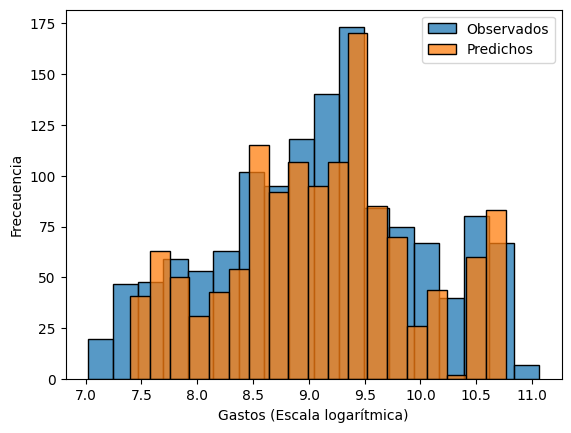

In [148]:
# Modelo
modelo_knn=KNeighborsRegressor(n_neighbors=11,weights="uniform",p=1)

# Entrenamos
modelo_knn.fit(X,Y)

# Hacemos las predicciones
Y_pred_knn=modelo.predict(X)

# Graficamos
sns.histplot(Y,label="Observados")
sns.histplot(Y_pred_knn, label="Predichos")
plt.ylabel("Freceuencia")
plt.xlabel("Gastos (Escala logarítmica)")
plt.legend()

Como podemos ver, este modelo tiende a ajustarse mejor a los datos observados.

<hr style="color:blue">

# <center> <span style="color:blue"> Predicciones en Datos Nuevos
<hr style="color:blue">

Ya que se han calibrado los modelos de regresión para la obtención de los mejores hiperparámetros y el mejor desempeño predictivo, es hora de realizar predicciones sobre datos que el modelo no ha visto.

Por lo tanto, de los modelos anteriores, podríamos tomar aquel que se ha ajustado de mejor manera a los datos observados y que ha tenido la mejor métrica de desempeño, y haciendo uso de los hiperparámetros calibrados en la búsqueda por rejilla, realizar la predicción sobre los nuevos datos. Para esto debemos tener en cuenta que antes de realizar las predicciones se debe entrenar el modelo con todos los datos anteriores, esto significa que debemos hacer un preprocesamiento de los datos, y por último, al cargar la nueva base de datos sobre la que queremos hacer las predicciones también debemos aplicarle el mismo preprocesamiento que le hayamos hecho a la base de entrenamiento, de esta manera nos aseguramos de hacer correctamente las predicciones:

In [149]:
# Modelos finales
modelo_final_knn=KNeighborsRegressor(n_neighbors=11,weights="uniform",p=1)

# Previo a entrenar el modelo final, es necesario preprocesar los datos
escalar=MinMaxScaler()  # Definimos la tecnica de reescalamiento
escalar.fit(X)          # Aprendemos la tecnica
X=pd.DataFrame(escalar.transform(X),columns=X.columns)  # Se aplica la tecnica de reescalamiento, regresando la matriz que resulta a un Dataframe

# Una vez que tenmos los datos en la escala que necesitamos, entonces ya entrenamos el modelo
modelo_final_knn.fit(X,Y)

KNeighborsRegressor(n_neighbors=11, p=1)

Ya que tenemos el modelo final entrenado, cargamos la nueva base de datos, realizamos el preprocesamiento y generamos las predicciones.

Cualquier cambio que se le haya hecho a la base de datos durante el preprocesamiento se le debe aplicar a la base de las predicciones para que sean las mismas, además se debe verificar que el tipo de datos sea el mismo para cada atributo.



In [160]:
# Leemos la nueva base de datos
data_nuevos=pd.read_csv("gastos_medicos_nuevos.csv")
data_nuevos["edad"]=data_nuevos.edad.astype(int)        # debemos cambiar el tipo de dato para que ambas bases coincidan
data_nuevos

# Ahora le aplicamos el preprocesamiento de la base anterior, esto es: Crear las variables dummies y reescalar los datos:
# Creamos las dummies
X_nuevos=pd.get_dummies(data_nuevos)
nombres=X_nuevos.columns

# Reescalamos: Importante. Para reescalar los datos empleamos la misma estrategia que aprendio el algoritmo en el proceso de entrenamiento.
X_nuevos=pd.DataFrame(escalar.transform(X_nuevos),columns=nombres)
X_nuevos

# Hacemos las predicciones
gastos_predict=modelo_final_knn.predict(X_nuevos) # Logaritmos de los gastos medicos predichos

# Obtenemos los gastos reales
gastos_predict=np.exp(gastos_predict)

# Agregamos la columna de predicciones a la base de datos nueva
data_nuevos["gastos_predichos"]=gastos_predict
data_nuevos

,edad,sexo,imc,fumador,region,hijos,gastos_predichos
0,40,male,29.900000,no,southwest,2,7485.153114
1,47,male,32.300000,no,southwest,1,7909.769329
2,54,female,28.880000,no,northeast,2,12000.146496
3,37,male,30.568094,no,northeast,3,7119.129006
4,59,male,33.132854,yes,northeast,4,37996.965721
...,...,...,...,...,...,...,...
487,51,male,27.740000,no,northeast,1,10749.043005
488,33,male,42.400000,no,southwest,5,5947.045942
489,47,male,29.064615,no,northeast,4,10224.029464
490,41,female,24.260852,no,southeast,5,8797.164615


Ahora ya hemos realizado correctamente las predicciones sobre datos no vistos por el modelo, de la misma forma podemos cambiar el modelo y ver cuanto cambian las predicciones de los gastos.

Por último, si queremos guardar la base de datos con las predicciones:

In [161]:
# Guardamos la nueva base en formato csv
data_nuevos.to_csv("Gastos_predichos.csv")  # De esta manera guarda la base en la ruta de trabajo, en caso de querer cambiar
                                            # la ruta se debe agregar antes del nombre del archivo.